In [3]:
import networkx as nx
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
from IPython.display import Image
%matplotlib inline

### One way to obtain the OSM data is to input the geocode name as follows:

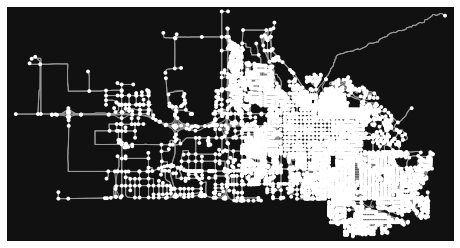

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [4]:
G = ox.graph_from_place("Salt Lake City, Utah, USA", network_type="drive")
ox.plot_graph(G)

### Another way to retrive the osm map is to use bounding box
`osmnx.geometries.geometries_from_bbox(north, south, east, west, tags)`

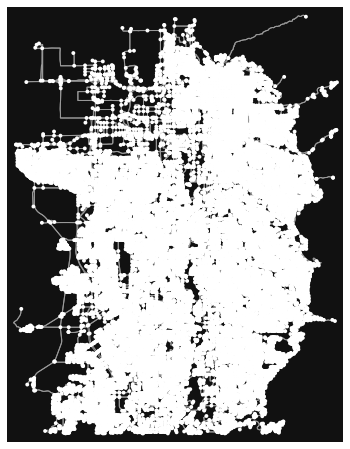

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
G = ox.graph_from_bbox(40.82552,40.47752,-112.11874,-111.75276, network_type="drive")
ox.plot_graph(G)

In [6]:
nodes, edges = ox.graph_to_gdfs(G)

In [7]:
nodes

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
83510174,40.687115,-112.003547,3,NaN,NaN,POINT (-112.00355 40.68712)
83510177,40.686822,-112.003537,1,turning_circle,NaN,POINT (-112.00354 40.68682)
83510183,40.629899,-111.957845,3,NaN,NaN,POINT (-111.95785 40.62990)
83510185,40.629886,-111.960791,3,NaN,NaN,POINT (-111.96079 40.62989)
83510196,40.685012,-112.027552,3,NaN,NaN,POINT (-112.02755 40.68501)
...,...,...,...,...,...,...
9309257179,40.724931,-112.023666,3,NaN,NaN,POINT (-112.02367 40.72493)
9309257238,40.718824,-112.029927,3,NaN,NaN,POINT (-112.02993 40.71882)
9309257289,40.725111,-112.038879,3,motorway_junction,10,POINT (-112.03888 40.72511)


In [8]:
edges_df = pd.DataFrame(edges).reset_index(level=[0,1])
edges_df.head()

,u,v,osmid,name,highway,oneway,length,geometry,lanes,maxspeed,ref,bridge,access,junction,tunnel,width
key,,,,,,,,,,,,,,,,
0,83510174,83510177,10124561,Kallie Circle,residential,False,32.569,"LINESTRING (-112.00355 40.68712, -112.00354 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,83510174,83603728,10137704,Kathleen Avenue,residential,False,93.337,"LINESTRING (-112.00355 40.68712, -112.00244 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,83510174,83554055,"[10137704, 10132317]","[Kathleen Avenue, 4755 West]",residential,False,199.320,"LINESTRING (-112.00355 40.68712, -112.00457 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,83510177,83510174,10124561,Kallie Circle,residential,False,32.569,"LINESTRING (-112.00354 40.68682, -112.00355 40...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,83510183,83578430,801708526,Constitution Boulevard,secondary,False,175.592,"LINESTRING (-111.95785 40.62990, -111.95783 40...",2,40 mph,NaN,NaN,NaN,NaN,NaN,NaN


### GWS84 ---> cartesian coordinate system

In [9]:
p = Proj(proj="utm", zone=12, ellps="WGS84", preserve_units=False)
nodes['plain_x'],nodes['plain_y']=p(nodes['x'],nodes['y'])
nodes

,y,x,street_count,highway,ref,geometry,plain_x,plain_y
osmid,,,,,,,,
83510174,40.687115,-112.003547,3,NaN,NaN,POINT (-112.00355 40.68712),415201.639906,4.504509e+06
83510177,40.686822,-112.003537,1,turning_circle,NaN,POINT (-112.00354 40.68682),415202.130637,4.504476e+06
83510183,40.629899,-111.957845,3,NaN,NaN,POINT (-111.95785 40.62990),418994.273861,4.498115e+06
83510185,40.629886,-111.960791,3,NaN,NaN,POINT (-111.96079 40.62989),418745.150950,4.498116e+06
83510196,40.685012,-112.027552,3,NaN,NaN,POINT (-112.02755 40.68501),413170.479391,4.504299e+06
...,...,...,...,...,...,...,...,...
9309257179,40.724931,-112.023666,3,NaN,NaN,POINT (-112.02367 40.72493),413550.536560,4.508726e+06
9309257238,40.718824,-112.029927,3,NaN,NaN,POINT (-112.02993 40.71882),413013.805524,4.508055e+06
9309257289,40.725111,-112.038879,3,motorway_junction,10,POINT (-112.03888 40.72511),412265.975525,4.508761e+06


In [10]:
with open("template_network4.xml",'w') as f:
    f.write('<?xml version="1.0" encoding="utf-8"?>\n')
    f.write('<!DOCTYPE network SYSTEM "http://www.matsim.org/files/dtd/network_v1.dtd">\n')
    f.write('<network name="equil test network">\n')
    f.write('\t<nodes>\n')
    for ID,x,y in zip(nodes.index,nodes['plain_x'],nodes['plain_y']):

        f.write(f'<node id="{ID}" x="{x}" y="{y}"/>\n')
    f.write('\t</nodes>\n')
    f.write('\t<links>\n')
    for ID,u,v,l in zip(range(len(edges_df)),edges_df['u'],edges_df['v'],edges_df['length']):
        f.write(f'\t<link id="{ID}" from="{u}" to="{v}" length="{l}" capacity="36000" freespeed="27.78" permlanes="1"/>\n')
    f.write('\t</links>\n')
    f.write('</network>')

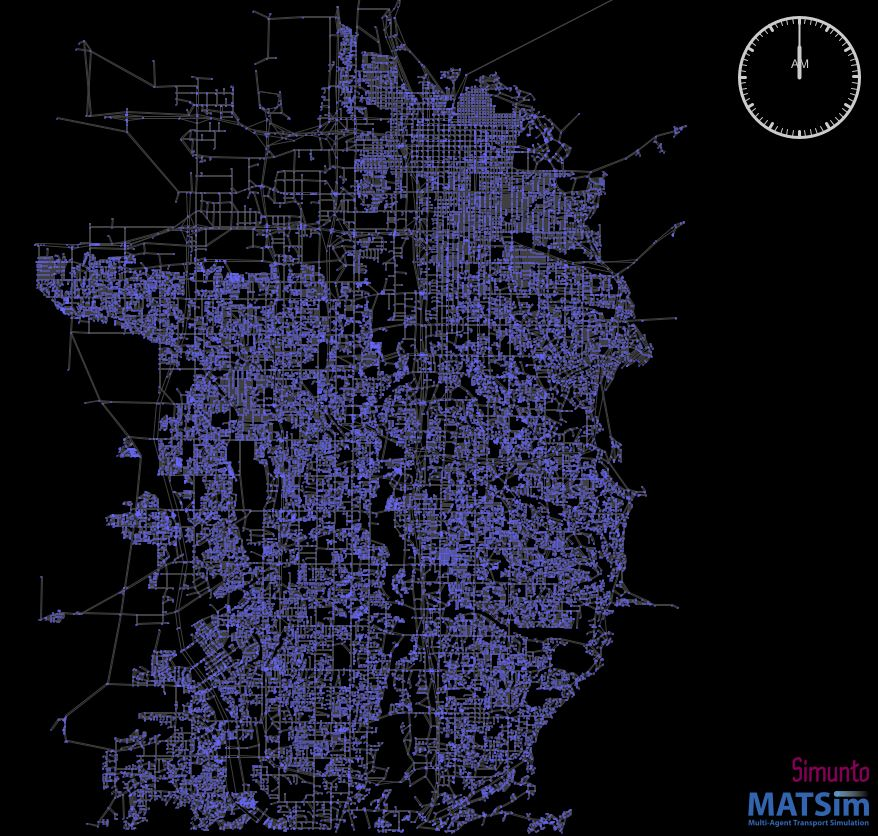

In [12]:
Image("C:/Users/Zhiyan/Desktop/res.jpg")

### Links in MATSim requires the following attributes:
#### 1. free_flow speed
#### 2. capacity
#### 3. num of lanes

### Take a closer look at "highway" attributes.
### The definition of highway in OSM wiki: https://wiki.openstreetmap.org/wiki/Key:highway

In [13]:
road_class_df=pd.DataFrame(edges_df.astype({'highway':'str'}).groupby('highway')['u'].count().sort_values(ascending=False))
road_class_df

,u
highway,
residential,72524
tertiary,9766
secondary,5330
primary,3222
unclassified,1625
motorway_link,830
motorway,311
trunk,251
secondary_link,101


### most of the roads are residential roads.
### a few roads have multiple labels    

In [14]:
edges_df=edges_df.reset_index()
edges_rm_na_df=edges_df.dropna(subset=['lanes'])
road_class_dropna_df=edges_rm_na_df.astype({'highway':'str'}).groupby('highway')['u'].count()
merged_df=pd.merge(road_class_df,road_class_dropna_df,left_index=True,right_on='highway')
merged_df.rename(columns={'u_x':'roads_count','u_y':'roads_with_lanes_attribute_count'},inplace=True)
merged_df.loc[['motorway','trunk','primary','secondary','tertiary','unclassified','residential'],:]

,roads_count,roads_with_lanes_attribute_count
highway,,
motorway,311,311
trunk,251,237
primary,3222,2928
secondary,5330,4140
tertiary,9766,4498
unclassified,1625,307
residential,72524,3268


### most tertiary, unclassified, and residential roads do not have lanes information.

In [15]:
edges_rm_speed_na_df=edges_df.dropna(subset=['highway','maxspeed'])
road_class_dropna_df=edges_rm_speed_na_df.astype({'highway':'str'}).groupby('highway')['u'].count()
merged_df=pd.merge(road_class_df,road_class_dropna_df,left_index=True,right_on='highway')
merged_df.rename(columns={'u_x':'roads_count','u_y':'roads_with_maxspeed_attribute_count'},inplace=True)
merged_df.loc[['motorway','trunk','primary','secondary','tertiary','unclassified','residential'],:]

,roads_count,roads_with_maxspeed_attribute_count
highway,,
motorway,311,293
trunk,251,204
primary,3222,2054
secondary,5330,2591
tertiary,9766,2964
unclassified,1625,158
residential,72524,4307


### The average speed of each class of roads:

In [16]:
def convert_to_num(x):
    if type(x) is str:
        return int(x.split(" ")[0])
    elif type(x) is float:
        return x
    else:
        return int(x[0].split(" ")[0])
new_df=edges_df[['highway','maxspeed']].dropna(subset=['maxspeed'])
new_df['maxspeed']=new_df['maxspeed'].apply(convert_to_num)
new_df.astype({'highway':'str'}).groupby('highway').mean().loc[['motorway','trunk','primary','secondary','tertiary','unclassified','residential'],:]

,maxspeed
highway,
motorway,66.416382
trunk,52.794118
primary,40.104674
secondary,36.082594
tertiary,30.909244
unclassified,28.860759
residential,24.735315


### If the 'maxspeed' is missing, we can use average value to replace the missing value.
### Lastly, how to deal with 'capacity' attribute?
maybe look into tables in some guidelines?